## EDA for Team : [Royal Challengers Bangalore] Performance

### Initiate Profiling from data file

Data Source : https://raw.githubusercontent.com/prashant-rocks/Data-Science/master/EDA/IPL-Dataset-Royal-Challengers-Bangalore-Performance-Analysis/src/data/deliveries.csv        

In [1]:
#importing all required packages
import pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas_profiling import ProfileReport


In [2]:
#Define path for data file
IPL_file_path = 'https://raw.githubusercontent.com/prashant-rocks/Data-Science/master/EDA/IPL-Dataset-Royal-Challengers-Bangalore-Performance-Analysis/src/data/deliveries.csv'

# Read the data and store data in DataFrame titled melbourne_data
IPL_df = pd.read_csv(IPL_file_path)

#Get the pre-profiling done for IPL data
df_profile = pandas_profiling.ProfileReport(IPL_df)

#Output pre-profiling to html file
df_profile.to_file(output_file="IPL_data_preprofiling.html")

IPL_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
#Data info and describe

IPL_df.info()

IPL_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# Create Plots

### RCB Top Run Scorer

Text(0, 0.5, 'Total Run')

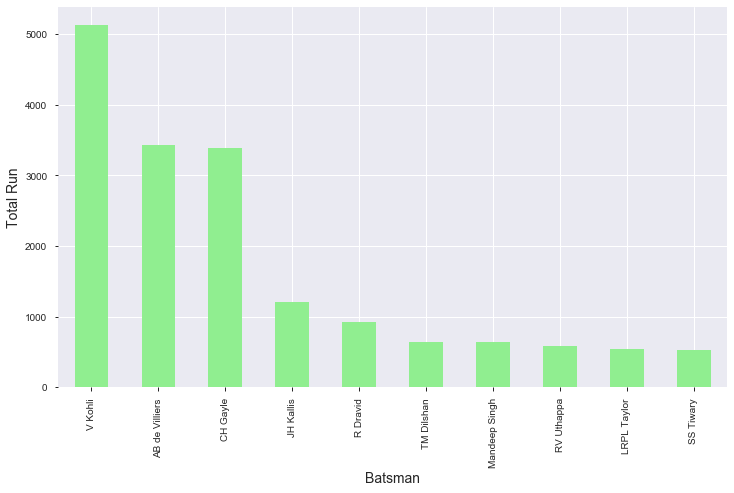

In [35]:
#Best Batsman    
IPL_df_bastman_all = IPL_df.loc[ IPL_df['batting_team'] == "Royal Challengers Bangalore" ]
IPL_df_bastman_all.groupby(['batsman'])[['total_runs']].agg('sum').sort_values(by ='total_runs', ascending=False).head(10).plot(kind="bar", figsize=(12, 7),color=['lightgreen'],legend= False)
plt.xlabel("Batsman", fontsize=14)
plt.ylabel("Total Run", fontsize=14)


### RCB Top Wicket Taker

Text(0, 0.5, 'Wickets')

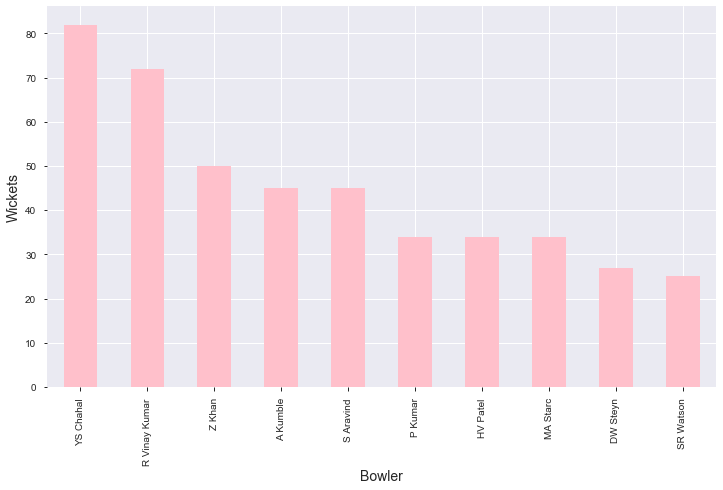

In [60]:

IPL_df_bowler_all = IPL_df.loc[ IPL_df['bowling_team'] == "Royal Challengers Bangalore" ].copy()
IPL_df_bowler_all['dismissal_kind'] = IPL_df_bowler_all['dismissal_kind'].apply(lambda x: 1 if (pd.notnull(x) and x != "run out") else 0)
IPL_df_bowler_all.groupby(['bowler'])[['dismissal_kind']].agg(sum).sort_values(by ='dismissal_kind' , ascending=False).head(10).plot( kind='bar', figsize=(12, 7), color=['pink'],legend=None)
plt.xlabel("Bowler", fontsize=14)
plt.ylabel("Wickets", fontsize=14)

### RCB inning wise Batsman performance

Text(0.5, 1.0, 'Bar Chart showing Second inning wise batsman performance')

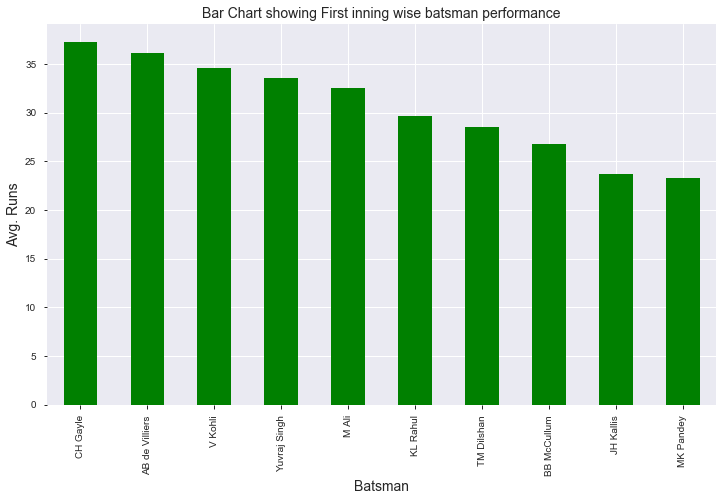

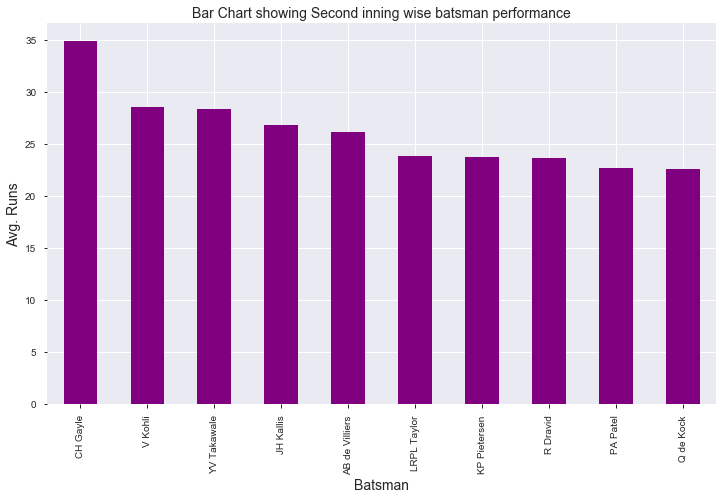

In [57]:

IPL_df_batsman  = IPL_df.loc[ IPL_df['batting_team'] == "Royal Challengers Bangalore" ].copy()

def f(x):
    matches_num = pd.concat([x['batsman'], x['match_id']]).nunique()
    return [ x['batsman_runs'].sum()/matches_num ]


IPL_df_batsman.loc[ (IPL_df_batsman['inning'] == 1) | (IPL_df_batsman['inning'] == 3) ].groupby(['batsman'])[['batsman_runs']].agg(f).sort_values(by ='batsman_runs' , ascending=False).head(10).plot( kind='bar', figsize=(12, 7), color=['green'],legend=None)

plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Avg. Runs', fontsize=14)
plt.title('Bar Chart showing First inning wise batsman performance', fontsize=14)

IPL_df_batsman.loc[ (IPL_df_batsman['inning'] == 2) | (IPL_df_batsman['inning'] == 4) ].groupby(['batsman'])[['batsman_runs']].agg(f).sort_values(by ='batsman_runs' , ascending=False).head(10).plot( kind='bar', figsize=(12, 7), color=['purple'],legend=None)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Avg. Runs', fontsize=14)
plt.title('Bar Chart showing Second inning wise batsman performance', fontsize=14)


### RCB Batsman weakness Dismissal-Type wise

Text(0, 0.5, 'Dismissal count')

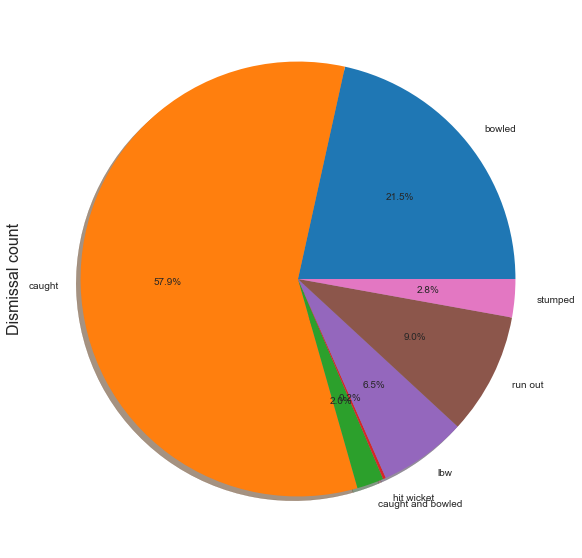

In [38]:
# Batsman weekness by dismissal type
IPL_df_batsman_perf = IPL_df_batsman.copy()
IPL_df_batsman_perf["dismissal_kind_count"] = IPL_df_batsman_perf["dismissal_kind"].apply( lambda x : 1 if (pd.notnull(x)) else 0)

IPL_df_batsman_perf.loc[IPL_df_batsman_perf["dismissal_kind"].notnull()].groupby(["dismissal_kind"])["dismissal_kind_count"].agg('sum').plot.pie(y='dismissal_kind',figsize=(10,10),autopct='%1.1f%%',shadow=True  , subplots = False)
plt.ylabel('Dismissal count', fontsize=16)


### RCB inning wise Bowler performance

Text(0.5, 1.0, 'Bar Chart showing Second inning wise Bowler performance')

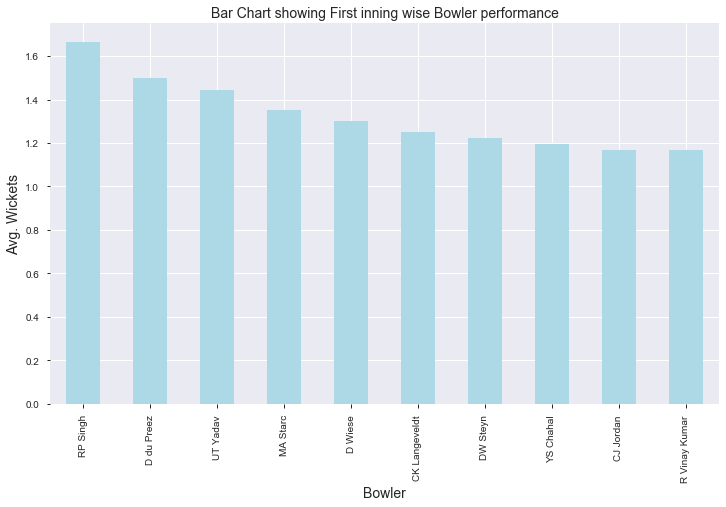

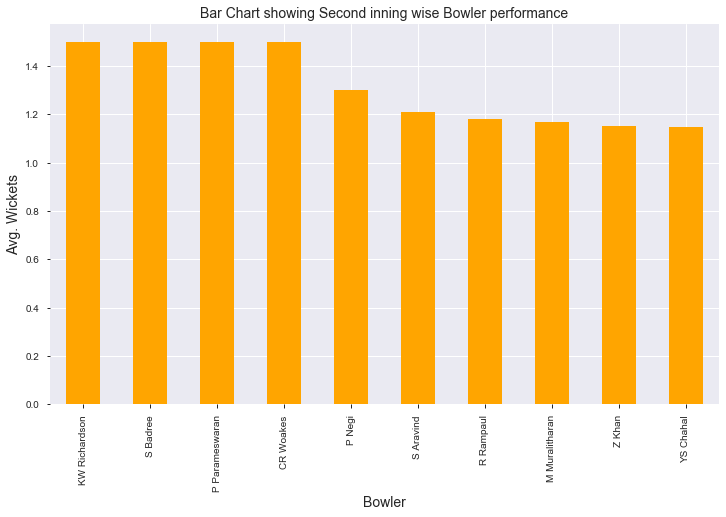

In [58]:

def fb(x):
    matches_num = pd.concat([x['bowler'], x['match_id']]).nunique()
    return [ x['dismissal_kind'].sum()/matches_num ]

IPL_df_bowler = IPL_df.loc[ IPL_df['bowling_team'] == "Royal Challengers Bangalore" ].copy()
IPL_df_bowler['dismissal_kind'] = IPL_df_bowler['dismissal_kind'].apply(lambda x: 1 if (pd.notnull(x) and x != "run out") else 0)

IPL_df_bowler.loc[ (IPL_df_bowler['inning'] == 1) | (IPL_df_bowler['inning'] == 3) ].groupby(['bowler'])[['dismissal_kind']].agg(fb).sort_values(by ='dismissal_kind' , ascending=False).head(10).plot( kind='bar', figsize=(12, 7), color=['lightblue'],legend=None)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Avg. Wickets', fontsize=14)
plt.title('Bar Chart showing First inning wise Bowler performance', fontsize=14)

IPL_df_bowler.loc[ (IPL_df_bowler['inning'] == 2) | (IPL_df_bowler['inning'] == 4) ].groupby(['bowler'])[['dismissal_kind']].agg(fb).sort_values(by ='dismissal_kind' , ascending=False).head(10).plot( kind='bar', figsize=(12, 7), color=['orange'],legend=None)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Avg. Wickets', fontsize=14)
plt.title('Bar Chart showing Second inning wise Bowler performance', fontsize=14)



### RCB inning wise winning ratio

D:\DOC\Learning\anaconda_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Winning Ratio')

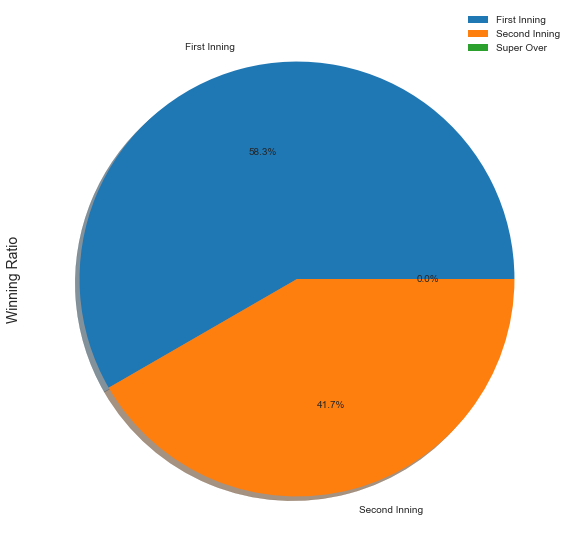

In [69]:
IPL_df_win = IPL_df.loc[ IPL_df['batting_team'] == "Royal Challengers Bangalore" ]
IPL_df_win['inning'] = IPL_df_win['inning'].apply( lambda x : "First Inning" if x==1 else ("Second Inning" if x == 2 else "Super Over" ) )
IPL_df_win = IPL_df_win.groupby(['match_id','inning','batting_team'])[['total_runs']].agg('sum')

mask = IPL_df_win["total_runs"] > IPL_df_win["total_runs"].shift(-1)
IPL_df_win.loc[mask , "win"] = 1
IPL_df_win.loc[~mask , "win"] = 0

IPL_df_win.groupby(['inning'])[['win','total_runs']].sum().plot.pie(y='win',figsize=(10,10),autopct='%1.1f%%',shadow=True  , subplots = False)
plt.ylabel("Winning Ratio", fontsize=14)